# 1 Introduction

#### Author: John Brandt

Visualize the geographic extent and density of candidate articles identified by keyword subsetting of document titles. Should be run after `2-download-fulltext`.

## 1.0 Package imports

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import os
import itertools

# 2 Visualizations

## 2.0 Function definitions

In [4]:
def load_year(country: str, year: int) -> pd.DataFrame:
    path = '../data/{}/metadata/{}/'.format(country, str(year))
    lats, longs = [], []
    types = []
    admin = gpd.read_file('../data/reference/{}.geojson'.format(country))
    for file in os.listdir(path):
        if ".csv" in file:
            df = pd.read_csv(path + file)
            lat = list(df['ActionGeo_Lat'])
            long = list(df['ActionGeo_Long'])
            lats.extend(lat)
            longs.extend(long)
            types.extend(list(df['QuadClass']))
            
    coords = pd.DataFrame({'Latitude': np.array(lats).flatten(), 
                           'Longitude': np.array(longs).flatten(),
                           'Type': np.array(types).flatten()})

    coords['latlong'] = coords["Latitude"].astype(str) + coords["Longitude"].astype(str)
    coords = coords.groupby(['latlong', 'Latitude', 'Longitude']).count().reset_index()

    coords = gpd.GeoDataFrame(coords, geometry=gpd.points_from_xy(coords.Longitude,
                                                                  coords.Latitude))
    coords['Type'] = coords['Type'].astype(float)
    return admin, coords

In [5]:
import pickle as pkl
def load_positives(country: str, year: int, month: int) -> pd.DataFrame:
    lats, longs = [], []
    types = []
    classifications = pd.read_csv(f'../data/{country}/output/{str(year)}/{str(month).zfill(2)}.csv')
    positive_idx = list(classifications['Index'][classifications['Conflict'] == True])
    for idx in positive_idx:
        path = f'../data/{country}/json/{str(year)}/{str(month).zfill(2)}/{str(idx).zfill(5)}.pkl'
        with open(path, 'rb') as pickle_file:
            data = pkl.load(pickle_file)
        lat = data['actions'][0]['ActionGeo_Lat']
        long = data['actions'][0]['ActionGeo_Long']
        print(data['actions'])
        lats.append(lat)
        longs.append(long)
        types.append(data['actions'][0]['QuadClass'])
    
        
    coords = pd.DataFrame({'Latitude': np.array(lats).flatten(), 
                           'Longitude': np.array(longs).flatten(),
                          'Type': np.array(types).flatten()})

    coords['latlong'] = coords["Latitude"].astype(str) + coords["Longitude"].astype(str)
    coords = coords.groupby(['latlong', 'Latitude', 'Longitude']).count().reset_index()

    coords = gpd.GeoDataFrame(coords, geometry=gpd.points_from_xy(coords.Longitude,
                                                                  coords.Latitude))
    coords['Type'] = coords['Type'].astype(float)
    return coords

## 2.1 Brazil

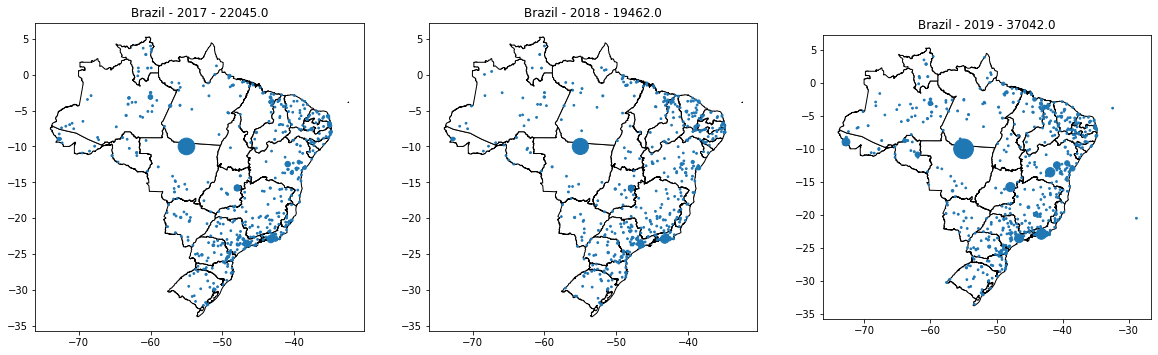

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 12))

brazil, coords = load_year('brazil', 2017)
ax1 = brazil.plot(color='white', edgecolor='black', ax = ax1)
ax1.set_title("Brazil - 2017 - {}".format(str(coords['Type'].sum())))
coords.plot(ax=ax1, markersize = (3 + coords['Type'] / 30))

brazil, coords = load_year('brazil', 2018)
ax2 = brazil.plot(color='white', edgecolor='black', ax = ax2)
ax2.set_title("Brazil - 2018 - {}".format(str(coords['Type'].sum())))
coords.plot(ax=ax2, markersize = (3 + coords['Type'] / 30))

brazil, coords = load_year('brazil', 2019)
ax3 = brazil.plot(color='white', edgecolor='black', ax = ax3)
ax3.set_title("Brazil - 2019 - {}".format(str(coords['Type'].sum())))
coords.plot(ax=ax3, markersize = (3 + coords['Type'] / 30))

In [7]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,10)

for year in (2017, 2018, 2019):
    for month in range(12, 13):

        brazil, coords1 = load_year('brazil', year)
        coords = load_positives('brazil', year, month)
        pl1 = brazil.plot(color='white', edgecolor='black')
        pl1.set_title(f"{str(year)}/{str(month).zfill(2)} - {str(coords['Type'].sum())[:-2]} events")
        coords.plot(ax=pl1, markersize = (15 + coords['Type'] * 2))
        plt.savefig(f'../data/brazil/figs/{str(year)}-{str(month).zfill(2)}.png')
#pl.show()

{0: {'Actor1Code': 910, 'Actor1Name': 'BRA', 'Actor2Code': 'BRAZIL', 'IsRootEvent': 'EUR', 'EventCode': 0, 'CAMEOCodeDescription': 172, 'EventRootCode': ' Impose administrative sanctions, not specified below', 'QuadClass': 17, 'GoldsteinScale': 4, 'NumMentions': -5.0, 'AvgTone': 1, 'ActionGeo_FullName': -2.8846153846153904, 'ActionGeo_Lat': 'Brazil', 'ActionGeo_Long': -10.0}, 1: {'Actor1Code': 911, 'Actor1Name': 'CAN', 'Actor2Code': 'CANADA', 'IsRootEvent': 'EUR', 'EventCode': 0, 'CAMEOCodeDescription': 172, 'EventRootCode': ' Impose administrative sanctions, not specified below', 'QuadClass': 17, 'GoldsteinScale': 4, 'NumMentions': -5.0, 'AvgTone': 1, 'ActionGeo_FullName': -2.8846153846153904, 'ActionGeo_Lat': 'Brazil', 'ActionGeo_Long': -10.0}, 2: {'Actor1Code': 912, 'Actor1Name': 'THA', 'Actor2Code': 'THAILAND', 'IsRootEvent': 'EUR', 'EventCode': 0, 'CAMEOCodeDescription': 172, 'EventRootCode': ' Impose administrative sanctions, not specified below', 'QuadClass': 17, 'GoldsteinScale

TypeError: must be real number, not str

In [34]:
import imageio
images = []
filenames = [x for x in os.listdir("../data/brazil/figs/") if '.png' in x]
filenames = sorted(filenames)
print(filenames)
for filename in filenames:
    print(filename)
    images.append(imageio.imread('../data/brazil/figs/' + filename))
imageio.mimsave('../data/brazil/figs/movie.gif', images, duration=0.25)

['2017-01.png', '2017-02.png', '2017-03.png', '2017-04.png', '2017-05.png', '2017-06.png', '2017-07.png', '2017-08.png', '2017-09.png', '2017-10.png', '2017-11.png']
2017-01.png
2017-02.png
2017-03.png
2017-04.png
2017-05.png
2017-06.png
2017-07.png
2017-08.png
2017-09.png
2017-10.png
2017-11.png


## 2.2 Indonesia

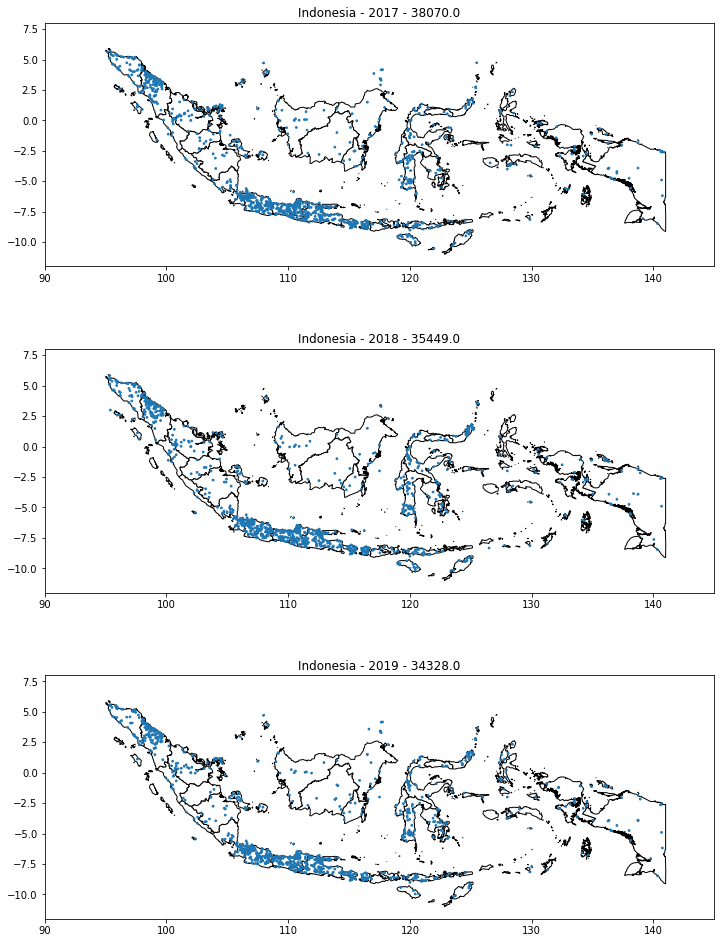

In [60]:
f, (ax1, ax2, ax3) = plt.subplots(nrows = 3, figsize=(12, 17))

indonesia, coords = load_year('indonesia', 2017)
ax1 = indonesia.plot(color='white', edgecolor='black', ax = ax1)
ax1.set_title("Indonesia - 2017 - {}".format(str(coords['Type'].sum())))
ax1.set_xlim(90, 145)
ax1.set_ylim(-12, 8)
coords.plot(ax=ax1, markersize = (3 + coords['Type'] / 300))

indonesia, coords = load_year('indonesia', 2018)
ax2 = indonesia.plot(color='white', edgecolor='black', ax = ax2)
ax2.set_title("Indonesia - 2018 - {}".format(str(coords['Type'].sum())))
ax2.set_xlim(90, 145)
ax2.set_ylim(-12, 8)
coords.plot(ax=ax2, markersize = (3 + coords['Type'] / 300))

indonesia, coords = load_year('indonesia', 2019)
ax3 = indonesia.plot(color='white', edgecolor='black', ax = ax3)
ax3.set_title("Indonesia - 2019 - {}".format(str(coords['Type'].sum())))
ax3.set_xlim(90, 145)
ax3.set_ylim(-12, 8)
coords.plot(ax=ax3, markersize = (3 + coords['Type'] / 300))

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (13,5)

for year in (2017, 2018, 2019):
    for month in range(1, 12):

        indonesia, coords1 = load_year('indonesia', year)
        coords = load_positives('indonesia', year, month)
        pl = indonesia.plot(color='white', edgecolor='black')
        pl.set_title(f"{str(year)}/{str(month).zfill(2)} - {str(coords['Type'].sum())[:-2]} events")
        pl.set_xlim(90, 145)
        pl.set_ylim(-12, 8)
        coords.plot(ax=pl, markersize = (10 + coords['Type']))
        plt.savefig(f'../data/indonesia/figs/{str(year)}-{str(month).zfill(2)}.png')
#pl.show()

In [31]:
import imageio
images = []
filenames = [x for x in os.listdir("../data/indonesia/figs/") if '.png' in x]
filenames = sorted(filenames)
print(filenames)
for filename in filenames:
    print(filename)
    images.append(imageio.imread('../data/indonesia/figs/' + filename))
imageio.mimsave('../data/indonesia/figs/movie.gif', images, duration=0.25)

['2017-01.png', '2017-02.png', '2017-03.png', '2017-04.png', '2017-05.png', '2017-06.png', '2017-07.png', '2017-08.png', '2017-09.png', '2017-10.png', '2017-11.png', '2018-01.png', '2018-02.png', '2018-03.png', '2018-04.png', '2018-05.png', '2018-06.png']
2017-01.png
2017-02.png
2017-03.png
2017-04.png
2017-05.png
2017-06.png
2017-07.png
2017-08.png
2017-09.png
2017-10.png
2017-11.png
2018-01.png
2018-02.png
2018-03.png
2018-04.png
2018-05.png
2018-06.png


# 2.3 Mexico

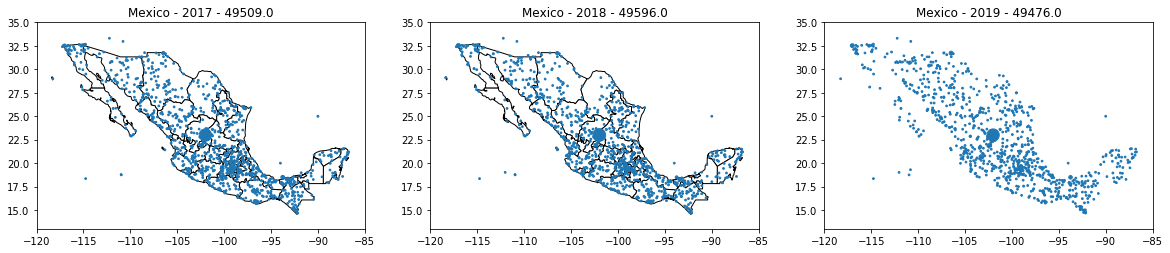

In [33]:
f, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(20, 12))

mexico, coords = load_year('mexico', 2017)
ax1 = mexico.plot(color='white', edgecolor='black', ax = ax1)
ax1.set_title("Mexico - 2017 - {}".format(str(coords['Type'].sum())))
ax1.set_ylim(13, 35)
ax1.set_xlim(-120, -85)
coords.plot(ax=ax1, markersize = (3 + coords['Type'] / 150))

mexico, coords = load_year('mexico', 2018)
ax2 = mexico.plot(color='white', edgecolor='black', ax = ax2)
ax2.set_title("Mexico - 2018 - {}".format(str(coords['Type'].sum())))
ax2.set_ylim(13, 35)
ax2.set_xlim(-120, -85)
coords.plot(ax=ax2, markersize = (3 + coords['Type'] / 150))

mexico, coords = load_year('mexico', 2019)
ax3 = brazil.plot(color='white', edgecolor='black', ax = ax3)
ax3.set_title("Mexico - 2019 - {}".format(str(coords['Type'].sum())))
ax3.set_ylim(13, 35)
ax3.set_xlim(-120, -85)
coords.plot(ax=ax3, markersize = (3 + coords['Type'] / 150))